# Problem Statement

4.	With the growing consumption of avocados in the USA, a freelance company would like to do some analysis on the patterns of consumption in different cities and would like to come up with a prediction model for the price of avocados. For this to be implemented, build a prediction model using multilinear regression and provide your insights on it.

 ---- ## -----

Lets import our dataset and libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,10)

In [2]:
data = pd.read_csv('Avacado_Price.csv')
data.head()

,AveragePrice,Total_Volume,tot_ava1,tot_ava2,tot_ava3,Total_Bags,Small_Bags,Large_Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Lets explore our dataset

In [3]:
data.shape

(18249, 12)

We have 18249 rows and 12 columns

In [4]:
data.describe()

,AveragePrice,Total_Volume,tot_ava1,tot_ava2,tot_ava3,Total_Bags,Small_Bags,Large_Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


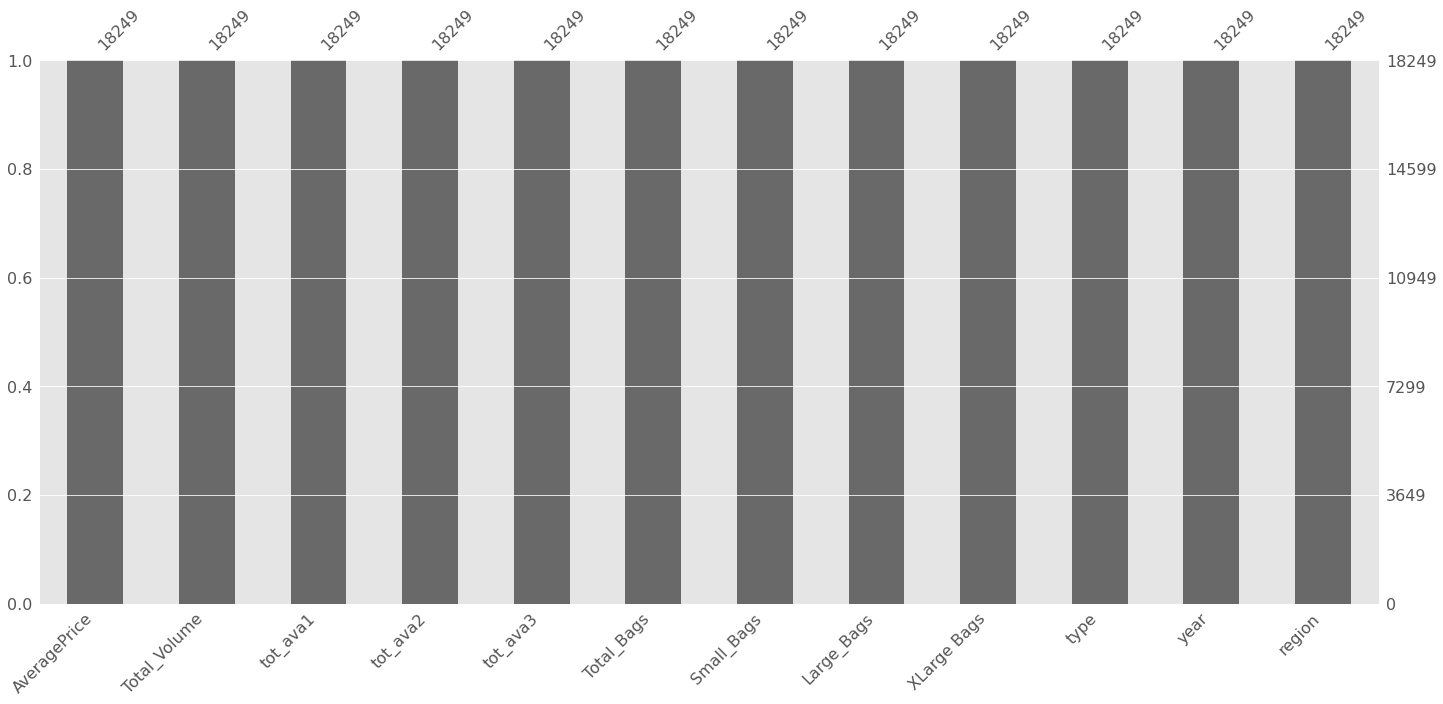

In [5]:
msno.bar(data)

There are no missing values in our dataset

In [6]:
data.columns

Index(['AveragePrice', 'Total_Volume', 'tot_ava1', 'tot_ava2', 'tot_ava3',
       'Total_Bags', 'Small_Bags', 'Large_Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

Lets see how many outliers we have in our dataset

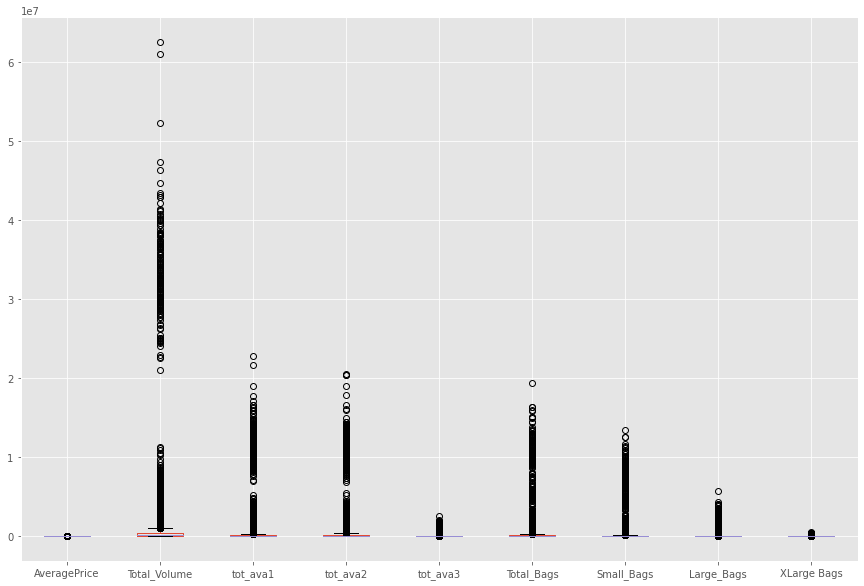

In [7]:
data[['AveragePrice', 'Total_Volume', 'tot_ava1', 'tot_ava2', 'tot_ava3',
       'Total_Bags', 'Small_Bags', 'Large_Bags', 'XLarge Bags']].plot(kind='box')

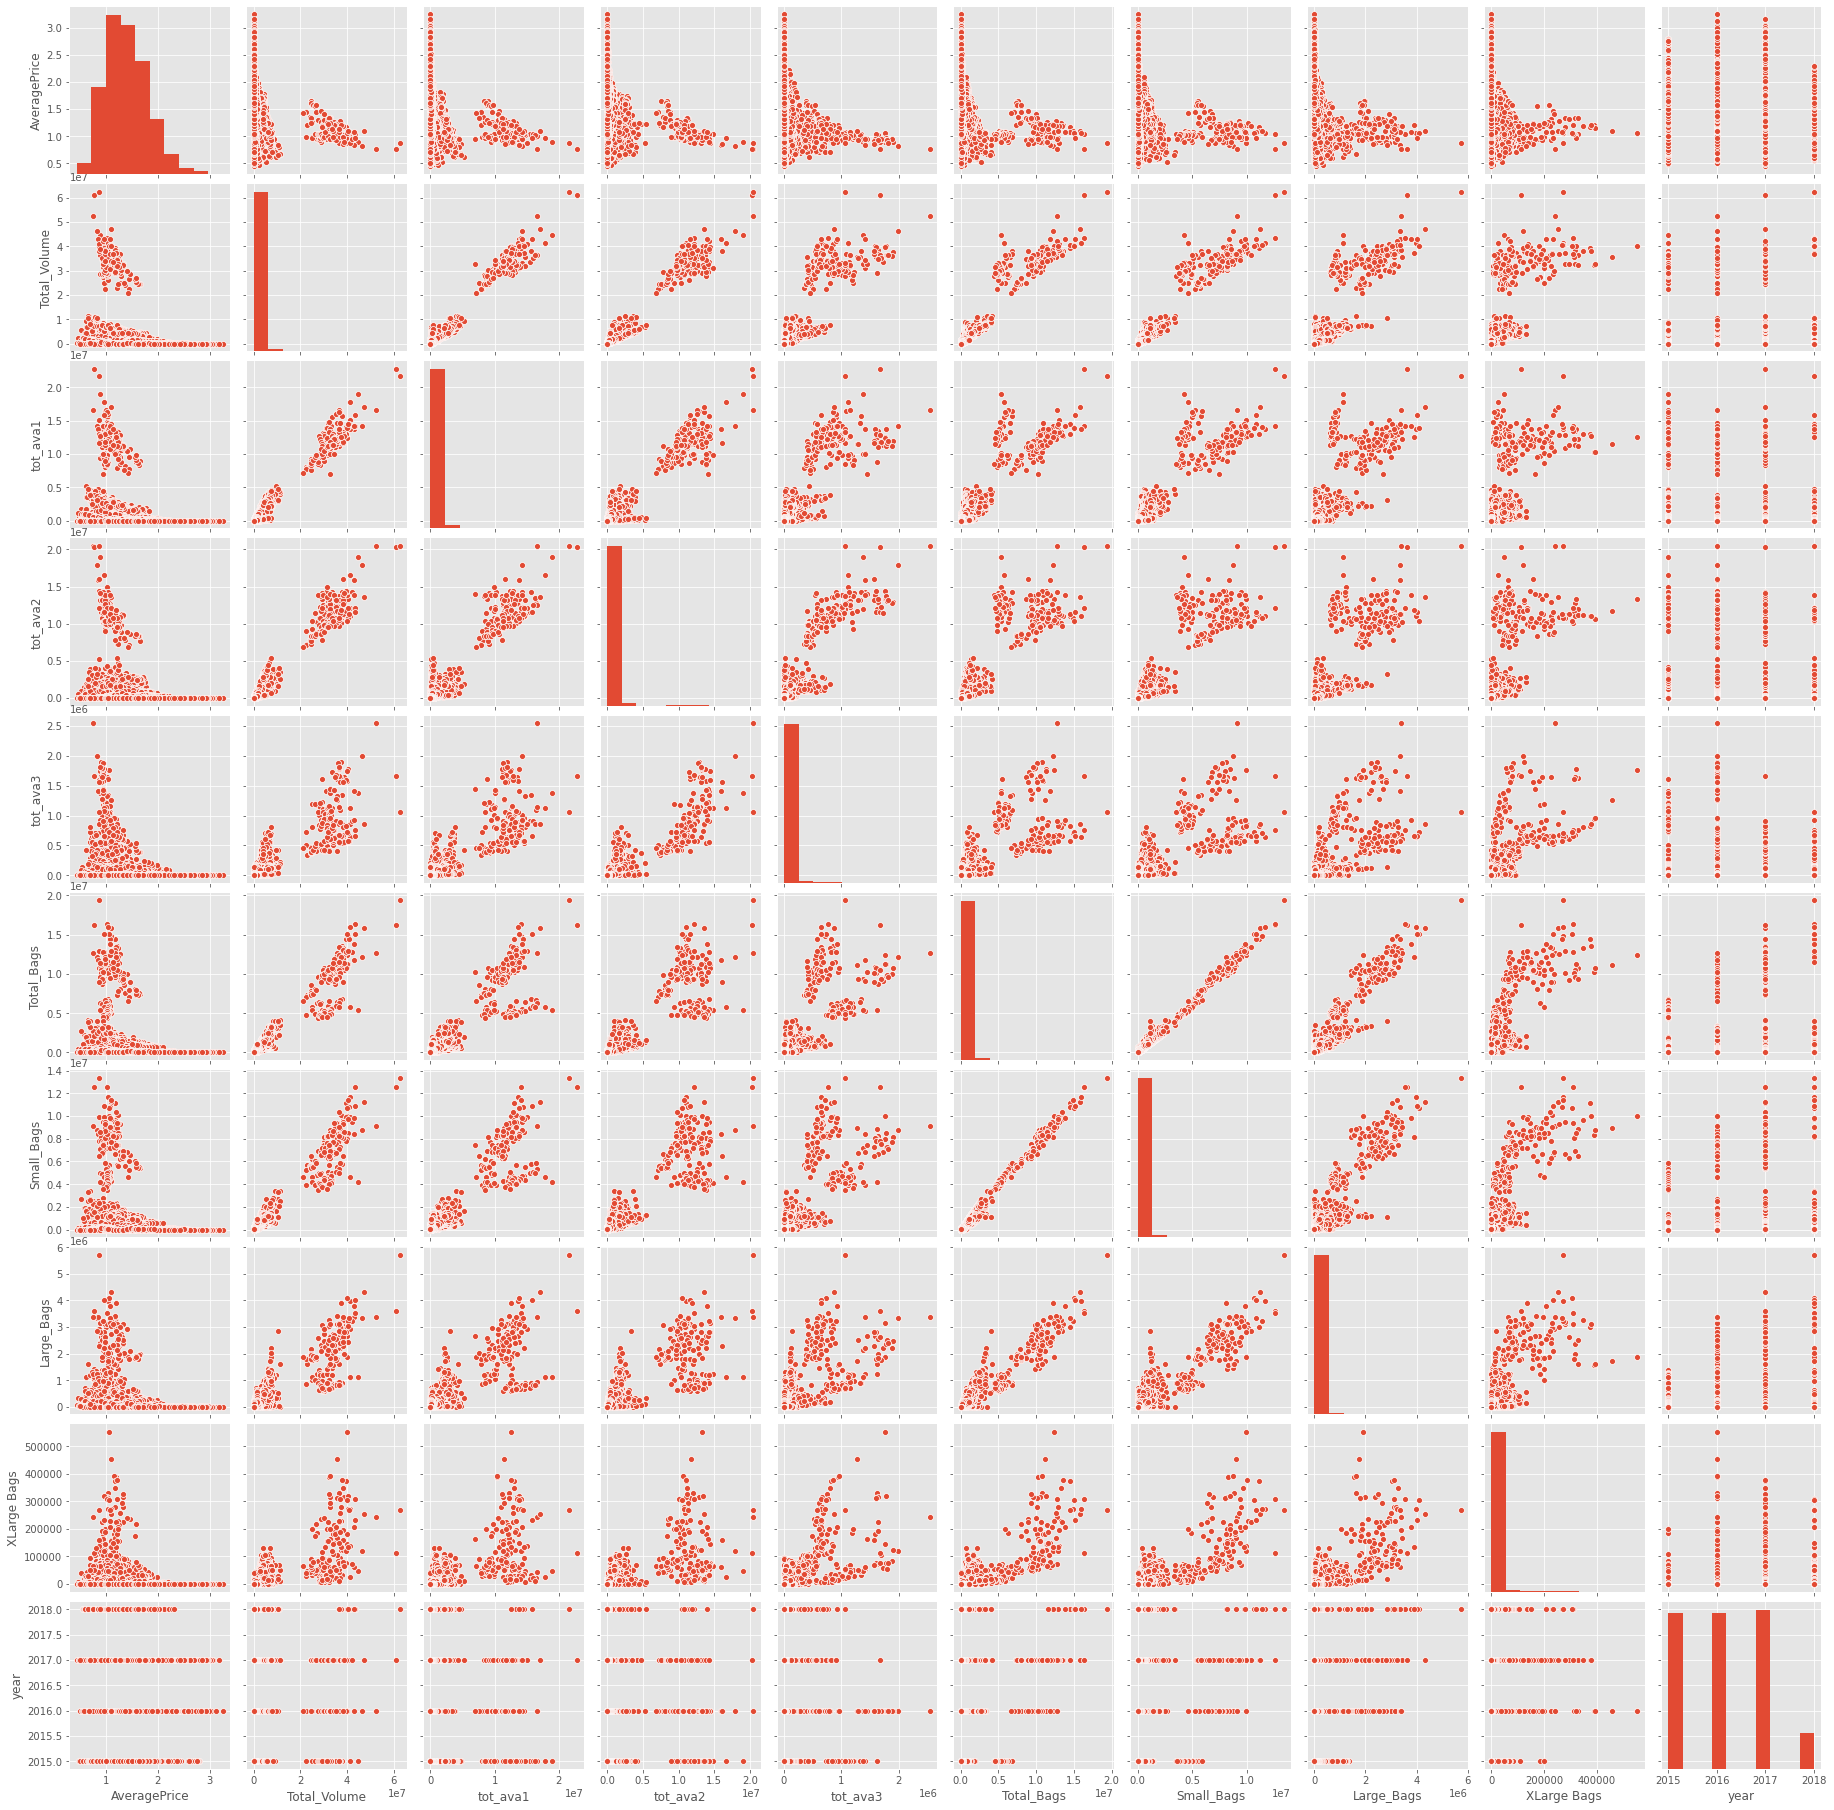

In [8]:
sns.pairplot(data)

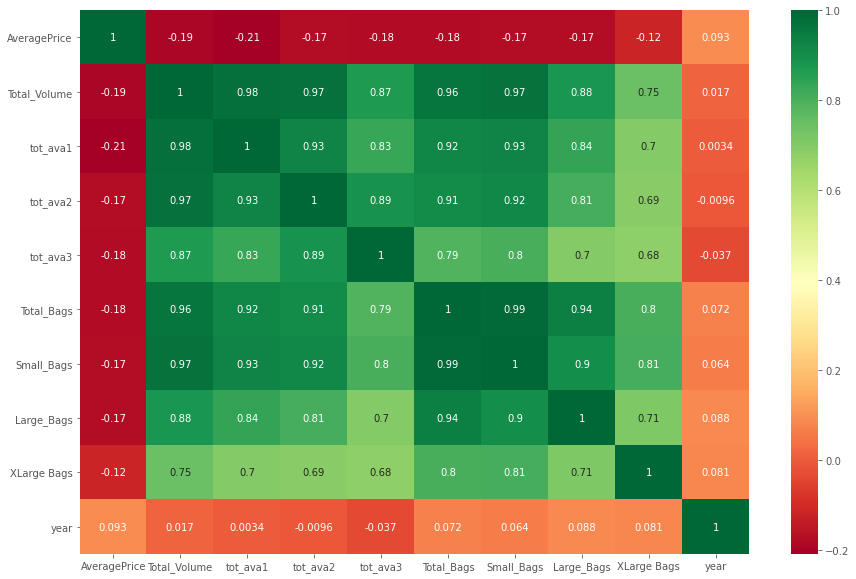

In [9]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')

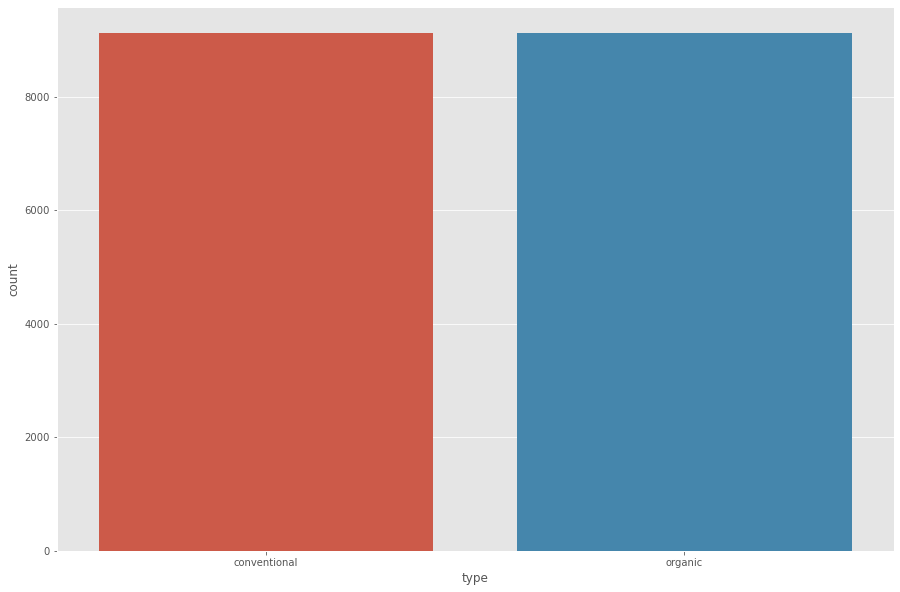

In [10]:
sns.countplot(data.type)

In [11]:
data.type.value_counts()/data.shape[0]

conventional    0.500082
organic         0.499918
Name: type, dtype: float64

In [12]:
data.columns

Index(['AveragePrice', 'Total_Volume', 'tot_ava1', 'tot_ava2', 'tot_ava3',
       'Total_Bags', 'Small_Bags', 'Large_Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

Lets check if our X variable is following normal distribution or not

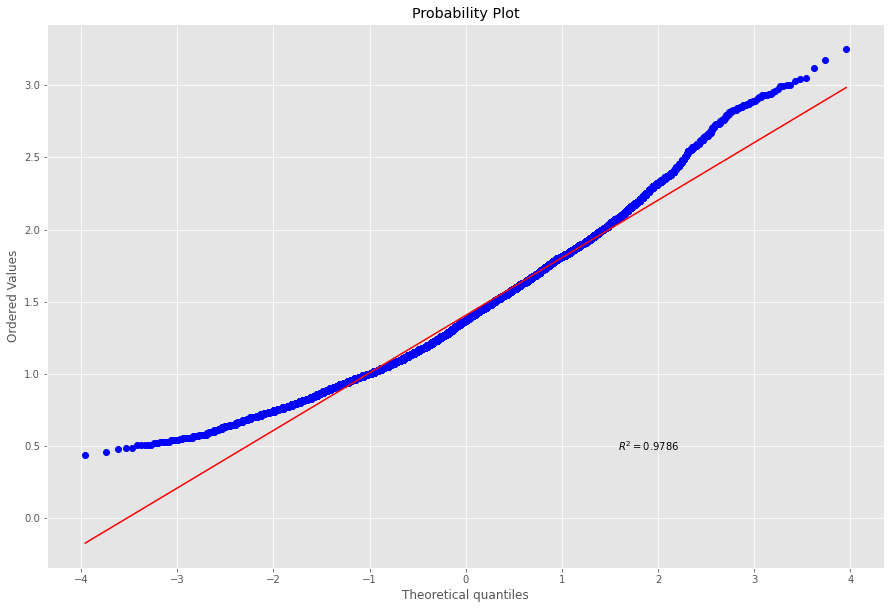

In [13]:
from scipy import stats
import pylab
stats.probplot(data.AveragePrice, dist = 'norm', plot = pylab, rvalue=True)
plt.show()

From the above chart and r value we can say our X variable is following normal distribution

Lets check for co-linearity in our dataset

In [14]:
import statsmodels.formula.api as smf

In [15]:
data.columns

Index(['AveragePrice', 'Total_Volume', 'tot_ava1', 'tot_ava2', 'tot_ava3',
       'Total_Bags', 'Small_Bags', 'Large_Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [16]:
data.rename(columns={'XLarge Bags':'XLarge_Bags'}, inplace = True)
data.columns

Index(['AveragePrice', 'Total_Volume', 'tot_ava1', 'tot_ava2', 'tot_ava3',
       'Total_Bags', 'Small_Bags', 'Large_Bags', 'XLarge_Bags', 'type', 'year',
       'region'],
      dtype='object')

In [17]:
ml1 = smf.ols('AveragePrice ~ Total_Volume + tot_ava1 + tot_ava2 + tot_ava3 + Total_Bags + Small_Bags + Large_Bags + XLarge_Bags', data = data).fit()
ml1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AveragePrice   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     124.0
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          3.03e-203
Time:                        09:27:17   Log-Likelihood:                -8810.8
No. Observations:               18249   AIC:                         1.764e+04
Df Residuals:                   18240   BIC:                         1.771e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.4232      0.003    474.871      0.000       1.417       1.429
Total_Volume     0.0002   5.89e-05      2.904      0.004    5.56e-05       0.000
tot_ava1        -0.0002   5.89e-05     -2.906      0.004      -0.000   -5.57e-05
tot_ava2        -0.0002   5.89e-05     -2.903      0.004      -0.000   -5.55e-05
tot_ava3        -0.0002   5.89e-05     -2.912      0.004      -0.000    -5.6e-05
Total_Bags      -0.0210      0.045     -0.464      0.643      -0.110       0.068
Small_Bags       0.0208      0.045      0.460      0.646      -0.068       0.110
Large_Bags       0.0208      0.045      0.460      0.646      -0.068       0.110
XLarge_Bags      0.0208      0.045      0.460      0.646      -0.068       0.110
==============================================================================
Omnibus:                     1114.407   Durbin-Watson:                   0.202
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1334.736
Skew:                           0.632   Prob(JB):                    1.46e-290
Kurtosis:                       3.400   Cond. No.                     1.30e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
import statsmodels.api as sm

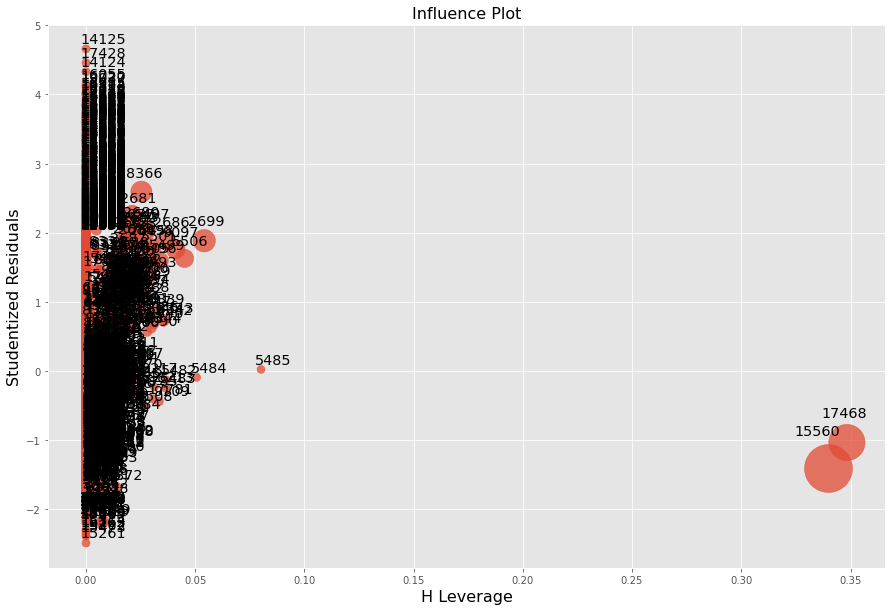

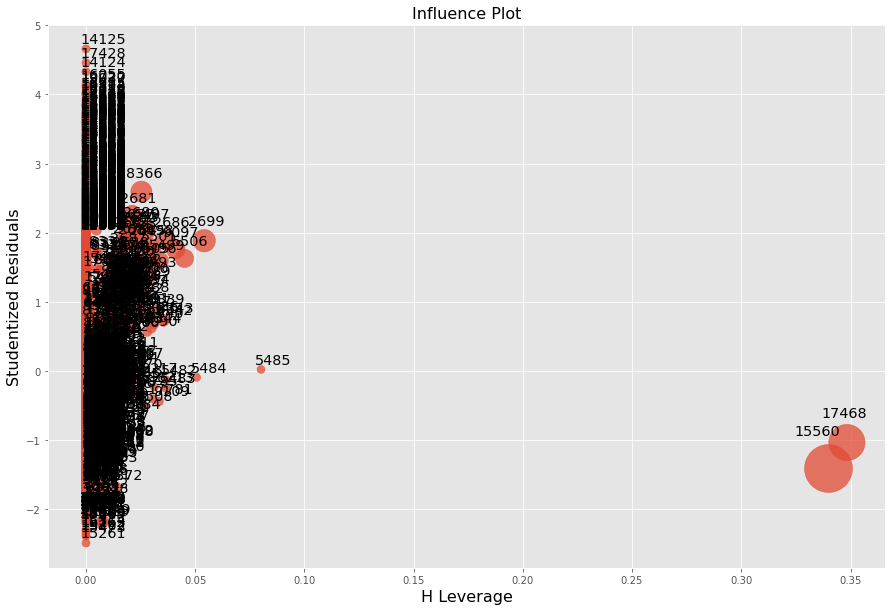

In [20]:
sm.graphics.influence_plot(ml1)

Lets exclude row number 15560 and 17468 from our dataset

In [23]:
data_new = data.drop(data.index[[15560,17468]])
data_new.shape

(18247, 12)

In [24]:
ml1 = smf.ols('AveragePrice ~ Total_Volume + tot_ava1 + tot_ava2 + tot_ava3 + Total_Bags + Small_Bags + Large_Bags + XLarge_Bags', data = data_new).fit()
ml1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AveragePrice   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     124.7
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          2.48e-204
Time:                        10:01:59   Log-Likelihood:                -8807.7
No. Observations:               18247   AIC:                         1.763e+04
Df Residuals:                   18238   BIC:                         1.770e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.4229      0.003    474.428      0.000       1.417       1.429
Total_Volume     0.0004      0.000      3.703      0.000       0.000       0.001
tot_ava1        -0.0004      0.000     -3.704      0.000      -0.001      -0.000
tot_ava2        -0.0004      0.000     -3.703      0.000      -0.001      -0.000
tot_ava3        -0.0004      0.000     -3.708      0.000      -0.001      -0.000
Total_Bags      -0.0212      0.045     -0.468      0.640      -0.110       0.068
Small_Bags       0.0208      0.045      0.459      0.646      -0.068       0.110
Large_Bags       0.0208      0.045      0.459      0.646      -0.068       0.110
XLarge_Bags      0.0208      0.045      0.459      0.646      -0.068       0.110
==============================================================================
Omnibus:                     1120.327   Durbin-Watson:                   0.202
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1343.237
Skew:                           0.633   Prob(JB):                    2.09e-292
Kurtosis:                       3.403   Cond. No.                     1.30e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

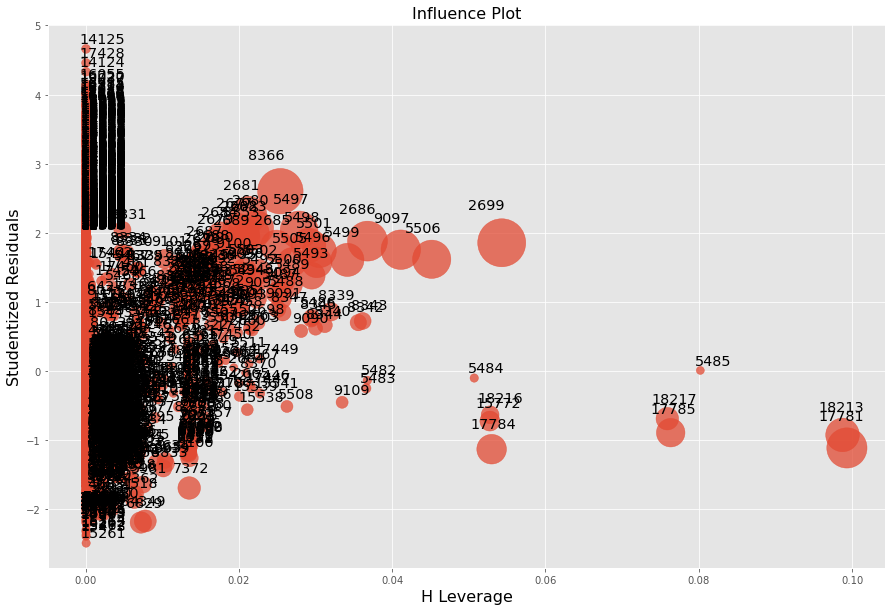

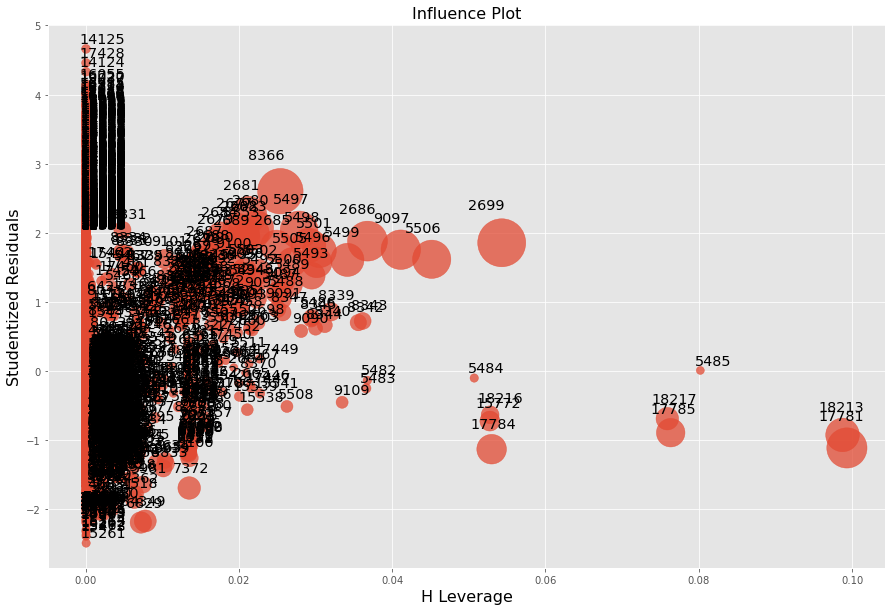

In [25]:
sm.graphics.influence_plot(ml1)

In [30]:
pred = ml1.predict(data_new)

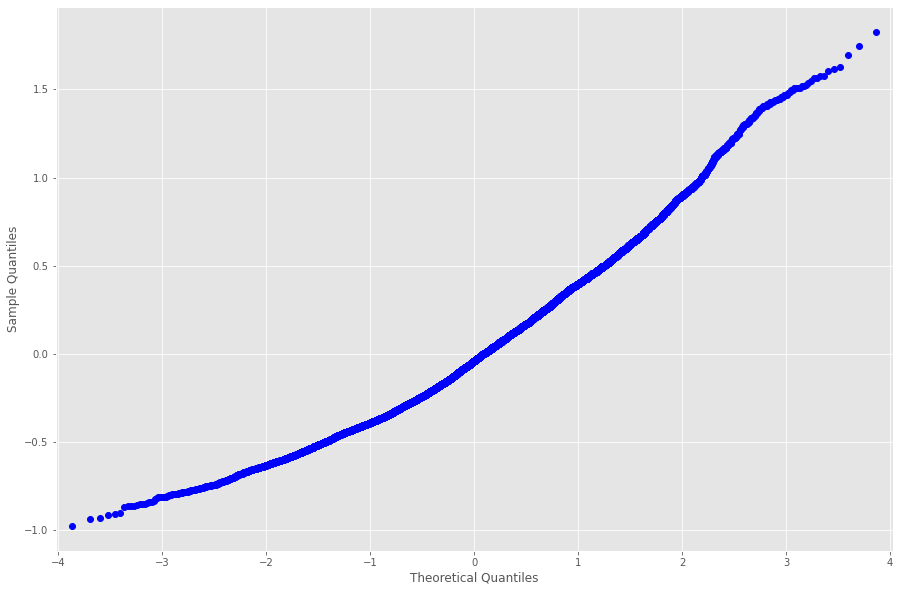

In [31]:
res = ml1.resid
sm.qqplot(res)
plt.show()

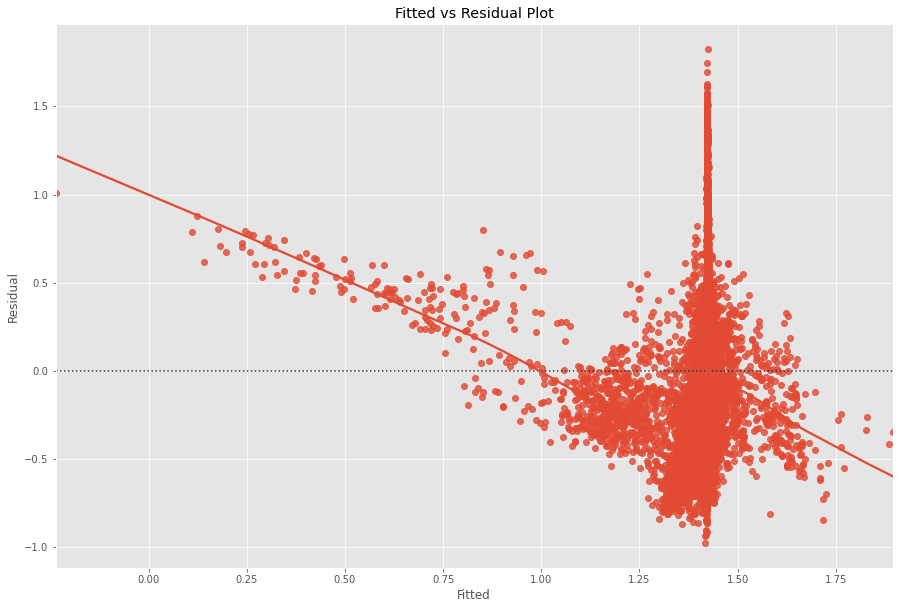

In [32]:
sns.residplot(x=pred, y = data_new.AveragePrice, lowess=True)
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.title('Fitted vs Residual Plot')
plt.show()

Building Models

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
data_train, data_test = train_test_split(data_new, test_size = 0.25)
print(data_train.shape), print(data_test.shape)

(13685, 12)
(4562, 12)


(None, None)

In [28]:
model_train = smf.ols('AveragePrice ~ Total_Volume + tot_ava1 + tot_ava2 + tot_ava3 + Total_Bags + Small_Bags + Large_Bags + XLarge_Bags', data = data_train).fit()
model_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AveragePrice   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     93.96
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          9.62e-153
Time:                        10:51:16   Log-Likelihood:                -6566.0
No. Observations:               13685   AIC:                         1.315e+04
Df Residuals:                   13676   BIC:                         1.322e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.4224      0.003    411.594      0.000       1.416       1.429
Total_Volume     0.0004      0.000      3.371      0.001       0.000       0.001
tot_ava1        -0.0004      0.000     -3.372      0.001      -0.001      -0.000
tot_ava2        -0.0004      0.000     -3.371      0.001      -0.001      -0.000
tot_ava3        -0.0004      0.000     -3.376      0.001      -0.001      -0.000
Total_Bags      -0.0183      0.049     -0.370      0.711      -0.115       0.078
Small_Bags       0.0179      0.049      0.362      0.717      -0.079       0.114
Large_Bags       0.0179      0.049      0.362      0.717      -0.079       0.114
XLarge_Bags      0.0179      0.049      0.362      0.717      -0.079       0.114
==============================================================================
Omnibus:                      822.250   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              980.877
Skew:                           0.627   Prob(JB):                    1.01e-213
Kurtosis:                       3.386   Cond. No.                     1.22e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
test_pred = model_train.predict(data_test)
test_resid = test_pred - data_test.AveragePrice
test_rmse = np.sqrt(np.mean(test_resid * test_resid))
test_rmse

0.3956114619888002